In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [69]:
# HIDDEN
n = 10000
a = -2
b = 2
z = stats.norm.rvs(size=n)
y = z**2 + stats.uniform.rvs(a, b-a, size=n)
xmin = min(z)
xmax = max(z)

In [76]:
# HIDDEN
def plot_curved_scatter():
    plt.scatter(z, y)
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.xlim(-2, 2)
    plt.ylim(-3, 6);

### Conditional Variance ###
This section brings us back to the conditional expectation $E(Y \mid X)$, this time looking at it in relation to the scatter plot of points $(X, Y)$ generated according to the joint distribution of $X$ and $Y$. Deviations from this conditional mean lead to a definition of conditional variance, which can be a useful tool for finding variances of random variables that are defined in terms of other random variables.

### Review of Conditional Expectation ###
In an earlier section we defined the conditional expectation $E(Y \mid X)$ as a function of $X$, as follows:

$$
b(x) ~ = ~ E(Y \mid X = x)
$$

We are using the letter $b$ to signifiy the "best guess" of $Y$ given the value of $X$. Later in this chapter we will make precise the sense in which it is the best. 

In random variable notation,
$$
E(Y \mid X) ~ = ~ b(X)
$$

Recall that the properties of conditional expectations are analogous to those of expectation, but the identities are of random variables, not real numbers. There are also some additional properties due to the aspect of conditioning. We provide a list of the properties here for ease of reference.

- **Linear transformation**: $E(aY + b \mid X) ~ = ~ aE(Y \mid X) + b$
- **Additivity**: $E(Y + W \mid X) ~ = ~ E(Y \mid X) + E(W \mid X)$
- **"The given variable is a constant"**: $E(g(X) \mid X) ~ = ~ g(X)$
- **"Pulling out" constants**: $E(g(X)Y \mid X) ~ = ~ g(X)E(Y \mid X)$
- **Independence**: If $X$ and $Y$ are independent then $E(Y \mid X) = E(Y)$, a constant.

The fundamental property that we have used most often is that of **iteration**:

$$
E\big{(} b(X) \big{)} ~ = ~ E\big{(} E(Y \mid X) \big{)} ~ = ~ E(Y)
$$

Therefore
$$
Var\big{(} b(X) \big{)} ~ = ~ E\Big{(} \big{(}b(X) - E(Y)\big{)}^2\Big{)}
$$

### Vertical Strips ###
As an example, let $X$ be standard normal, and let
$$
Y ~ = ~ X^2 + W
$$
where $W$ is uniform on $(-2, 2)$ and is independent of $X$. Then by properties of conditional expectation,

$$
E(Y \mid X) ~ = ~ E(X^2 \mid X) + E(W \mid X) ~ = ~ X^2 + E(W) ~ = ~ X^2 + 0 ~ = ~ X^2
$$

The graph below shows a scatter diagram of simulated $(X, Y)$ points, along with the curve $E(Y \mid X) = X^2$. Notice how the curve picks off the centers of the vertical strips. Given a value of $X$, the conditional expectation $E(Y \mid X)$ is essentially (upto sampling variabliity) the average of the vertical strip at the given value of $X$.

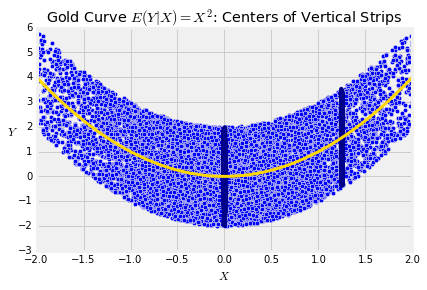

In [83]:
# HIDDEN
plot_curved_scatter()
xstar = 1.25
ystar = 3
tbl = Table().with_columns('x', z, 'y', y)
strip1 = tbl.where('x', are.between(xstar-0.01, xstar+0.012))
plt.plot(strip1.column(0), strip1.column(1), color='darkblue')
strip2 = tbl.where('x', are.between(-0.01, 0.012))
plt.plot(strip2.column(0), strip2.column(1), color='darkblue')
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot(x, x**2, color='gold', lw=3)
plt.title('Gold Curve $E(Y | X) = X^2$: Centers of Vertical Strips');

### Deviation from the Conditional Mean ###
As we said in Data 8, the points in each vertical strip form their own little data set, with their own mean. In probability language, the conditional distribution of $Y$ given $X = x$ has mean $E(Y \mid X = x)$.

The deviation from the conditional mean given $X = x$ is $Y - E(Y \mid X = x) ~ = ~ Y - b(x)$. An example of such a deviation is the length of the red segment in the graph below.

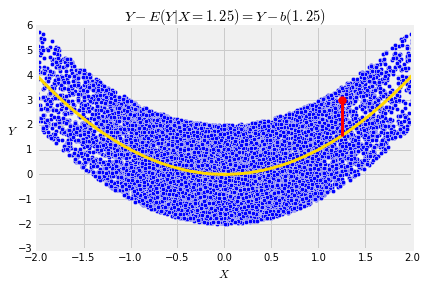

In [71]:
# HIDDEN
plot_curved_scatter()
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot(x, x**2, color='gold', lw=3)
xstar = 1.25
ystar = 3
plt.plot([xstar, xstar], [ystar, xstar**2], color='red', lw=3)
plt.scatter(xstar, ystar, color='red', s=60)
plt.title('$Y - E(Y | X = 1.25) = Y - b(1.25) $')
plt.xlim(-2, 2)
plt.ylim(-3, 6);

In random variable notation, this deviation from the mean of a random vertical strip becomes

$$
Y - E(Y \mid X) ~ = ~ Y - b(X)
$$

For any distribution, all of the deviations from average cancel each other out and have an average of 0. The calculation below establishes this for each vertical strip:

$$
E(Y - b(X) \mid X) ~ = ~  E(Y \mid X) - b(X) ~ = ~ E(Y \mid X) - E(Y \mid X) ~ = ~ 0
$$

This result helps us understand the relation between $X$ and the deviation $Y - b(X)$ within the vertical strip at $X$. First, let $g(X)$ be any function of $X$. Then

$$
E\big{(}(Y - b(X))g(X) \mid X\big{)} ~ = ~ g(X)E(Y - b(X) \mid X) = 0
$$

So by iteration, the expected product of $g(X)$ the deviation $Y - b(X)$ is 0:

$$
E\big{(}(Y - b(X))g(X)\big{)} ~ = ~ E\Big{(}E\big{(}(Y - b(X))g(X) \mid X\big{)}\Big{)} ~ = ~ 0
$$

Because $E(Y - b(X)) = 0$, we see that the covariance between $g(X)$ and the deviation is

$$
Cov(g(X), Y - b(X)) ~ = ~ 0
$$

That is, **the deviation from the conditional mean is uncorrelated with functions of $X$**.

### Conditional Variance ###
In terms of the scatter plot, the familiar quantity $Var(Y) = E\big{(}(Y - E(Y))^2\big{)}$ is  the mean squared distance between the points and the horizontal line at level $E(Y)$. 

In our example, $Y = X^2 + W$ where $X$ is standard normal and $W$ is uniform on $(-2, 2)$. So $E(Y) = E(X^2) = 1$ because $X^2$ has the chi-squared $(1)$ distribution.

Clearly, the rough size of the deviations from the flat line at $E(Y)$ is greater than the rough size of the deviation from the conditional expectation curve $E(Y \mid X)$.

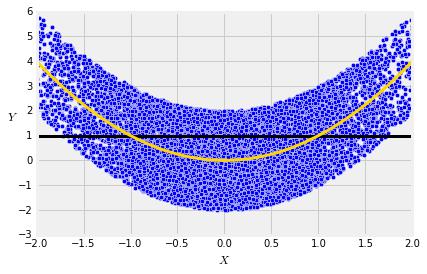

In [72]:
# HIDDEN
plot_curved_scatter()
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot(x, np.ones(len(x)), color='k', lw=3)
plt.plot(x, x**2, color='gold', lw=3)
plt.xlim(-2, 2)
plt.ylim(-3, 6);

To quantify this, we will first define the *conditional variance of $Y$ given $X$* as

$$
Var(Y \mid X) ~ = ~ E\Big{(} \big{(}Y - E(Y \mid X)\big{)}^2 \mid X \Big{)}
~ = ~ E\Big{(} \big{(}Y - b(X)\big{)}^2 \mid X \Big{)}
$$

To understand this definition, keep in mind that being "given X" is the same as working within the vertical strip at a random value on the horizontal axis chosen according to the distribution of $X$. The conditional distribution of $Y$ in that strip has a variance. That's $Var(Y \mid X)$.

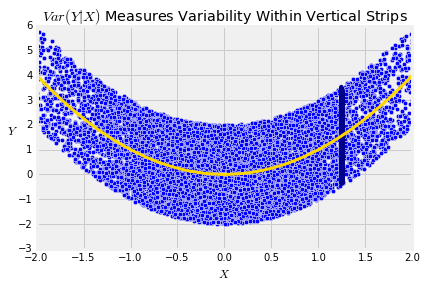

In [85]:
# HIDDEN
plot_curved_scatter()
xstar = 1.25
tbl = Table().with_columns('x', z, 'y', y)
strip = tbl.where('x', are.between(xstar-0.01, xstar+0.012))
plt.plot(strip.column(0), strip.column(1), color='darkblue')
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot(x, x**2, color='gold', lw=3)
plt.title('$Var(Y | X)$ Measures Variability Within Vertical Strips');

Now let's see how variance and conditional variance are related to each other.

### Variance by Conditioning ###
The vertical distance between a point and the flat line at $E(Y)$ is thus sum of two distances: the vertical distance between the point and the curve $E(Y \mid X)$, and the distance between the curve and the flat line.

$$
Y - E(Y) ~ = ~ (Y - E(Y \mid X)) + (E(Y \mid X) - E(Y) ~ = ~ (Y - b(X)) + (b(X) - E(Y))
$$

The first term on the right hand side is the red segment and the second term is the green segment right below it.

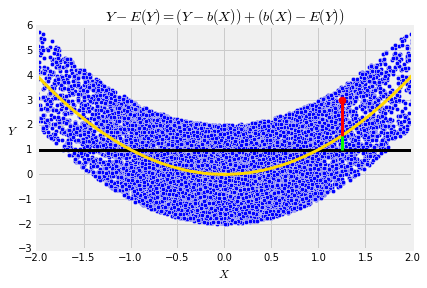

In [88]:
# HIDDEN
plot_curved_scatter()
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot([xmin, xmax], [1, 1], color='k', lw=3)
plt.plot(x, x**2, color='gold', lw=3)
xstar = 1.25
ystar = 3
plt.plot([xstar, xstar], [ystar, xstar**2], color='red', lw=3)
plt.plot([xstar, xstar], [xstar**2, 1], color='lime', lw=3)
plt.scatter(xstar, ystar, color='red', s=50)
plt.title('$Y - E(Y) = (Y - b(X)) + (b(X) - E(Y))$')
plt.xlim(-2, 2)
plt.ylim(-3, 6);

Now we can see how the variance of $Y$ breaks down, using these two pieces.

\begin{align*}
Var(Y) ~ &= ~ E\Big{(}\big{(}Y - E(Y)\big{)}^2\Big{)} \\
&= ~ E\Big{(} \big{(} (Y-b(X)) + (b(X) - E(Y)) \big{)}^2\Big{)} \\
&= ~ E\Big{(}\big{(}Y - b(X)\big{)}^2\Big{)} + E\Big{(}\big{(}b(X) - E(Y)\big{)}^2\Big{)} + 2E\Big{(}\big{(}Y - b(X)\big{)}\big{(}b(X) - E(Y)\big{)}\Big{)} \\
&= ~ E\Big{(}\big{(}Y - b(X)\big{)}^2\Big{)} + Var\Big{(}b(X)\Big{)}
\end{align*}

The cross product term is 0 because $b(X) - E(Y)$ is a function of $X$ (remember that $E(Y)$ is a constant) and the deviation $Y - b(X)$ is uncorrelated with functions of $X$.

Thus we have shown:

**Variance is the sum of the expectation of the conditional variance and the variance of the conditional expectation.**

It makes sense that the two quantities on the right hand side are involved. The variability of $Y$ has two components:
- the rough size of the variability within the individual vertical strips, that is, the expectation of the conditional variance
- the variability between strips, measured by the variance of the centers of the strips.

The beautiful property of variance is that you can just add the two terms to get the unconditional variance.

We know that the lengths of the red and green segments are uncorrelated; the deviation $Y - b(X)$ is uncorrelated with $b(X) - E(Y)$. What the result is saying is that the square of the sum of the two distances is the sum of their squares. There is a precise analogy between this result and Pythagoras' Theorem, with "uncorrelated" replacing "orthogonal". In later sections we will get a better sense of this analogy. The geometry requires an understanding of orthogonal vectors and is well worth studying.